# House Price Prediction with some Feature Engineering

## Data

In [1]:
import pandas as pd
import numpy as np

path1= 'C:/Users/David Yohast/Downloads/2021-08 Kaggle ML Learn/Data/train.csv'
path2= 'C:/Users/David Yohast/Downloads/2021-08 Kaggle ML Learn/Data/test.csv'

train_df = pd.read_csv(path1, index_col='Id')
test_df = pd.read_csv(path2, index_col='Id')

In [2]:
pd.set_option('display.max_rows', 10)

train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [3]:
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [4]:
cat_cols = [col for col in train_df.columns if train_df[col].dtype in ['object']]

cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [5]:
num_cols = [col for col in train_df.columns if train_df[col].dtype in ['int64', 'float64']]
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

## Handling Missing Values Using fillna


In [6]:
for cols in cat_cols:
    train_df[cols].fillna(train_df[cols].mode(), inplace=True)

for cols in num_cols:
    train_df[cols].fillna(train_df[cols].mean(), inplace=True)
    
pd.set_option('display.max_rows', 80)
print(train_df.isnull().sum())

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [7]:
# Now for test dataset
test_df.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [8]:
cat_cols2 = [col for col in test_df.columns if test_df[col].dtype.name in ['object', 'category']]
num_cols2 = [col for col in test_df.columns if test_df[col].dtype.name in ['int64', 'float64']]

for cols in cat_cols2:
    test_df[cols].fillna(test_df[cols].mode(), inplace=True)

for cols in num_cols2:
    test_df[cols].fillna(test_df[cols].mean(), inplace=True)
    
pd.set_option('display.max_rows', 79)
print(test_df.isnull().sum())

MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          0
BsmtFinType2       42
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [9]:
# I'm decided to drop all columns that still filled with na T_T

train_df.dropna(axis=1, inplace=True)
test_df.dropna(axis=1, inplace=True)

In [10]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Because the number of columns is not same, then we should subset with the test dataset

In [11]:
train_cols = [cols for cols in train_df.columns]
test_cols = [cols for cols in test_df.columns]

train_subset = [cols for cols in train_cols if cols in test_cols]
test_subset = [cols for cols in test_cols if cols in train_subset]

In [12]:
new_train_df = train_df[train_subset]
new_test_df = test_df[test_subset]

print(new_train_df.info())
print(new_test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [13]:
y = train_df['SalePrice']

## Mutual Information

In [14]:
# We need to transform categorical variables into int type (encoding)
X = new_train_df.copy()

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

In [15]:
discrete_features

MSSubClass       False
LotFrontage      False
LotArea          False
Street           False
LotShape         False
LandContour      False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars 

In [16]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_score = make_mi_scores(X, y, discrete_features)

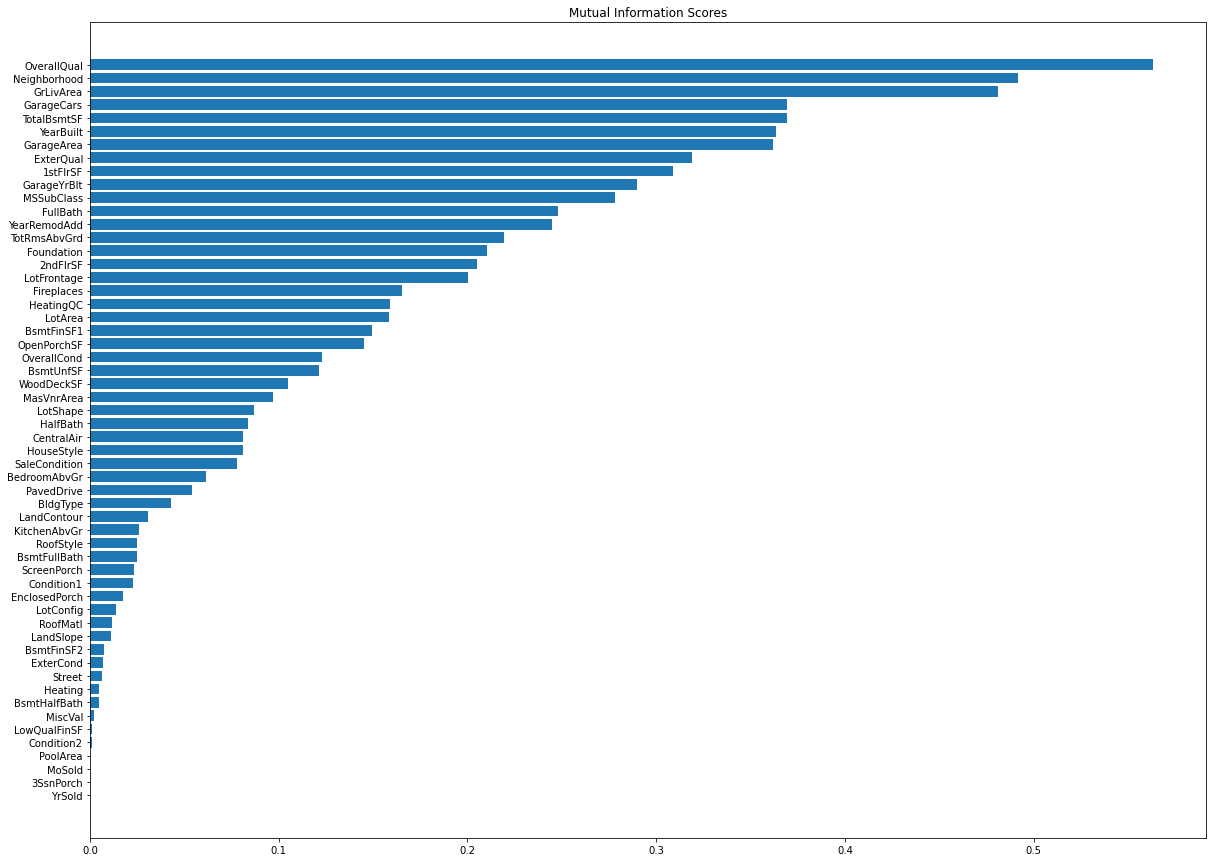

In [17]:
import matplotlib.pyplot as plt

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plt.figure(figsize=(20, 15))
plot_mi_scores(mi_score)

In [18]:
# Choosing columns that has score > 0

X_MI = X.loc[:, mi_score > 0.0]

### Performance Benchmark, before vs After Mutual Information

In [19]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

def r2_score (X, y, model=XGBRegressor(n_estimators = 1000, learning_rate = 0.01)):
    score = cross_val_score(
        model, X, y, cv=5, scoring="r2")
    score = score.mean()
    return score

print("Base Score", r2_score(X,y))
print("After MI Score", r2_score(X_MI,y))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

Base Score 0.8698716185508133


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


After MI Score 0.8724848929242779


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## Feature Creation

In [20]:
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition'],
      dtype='object')

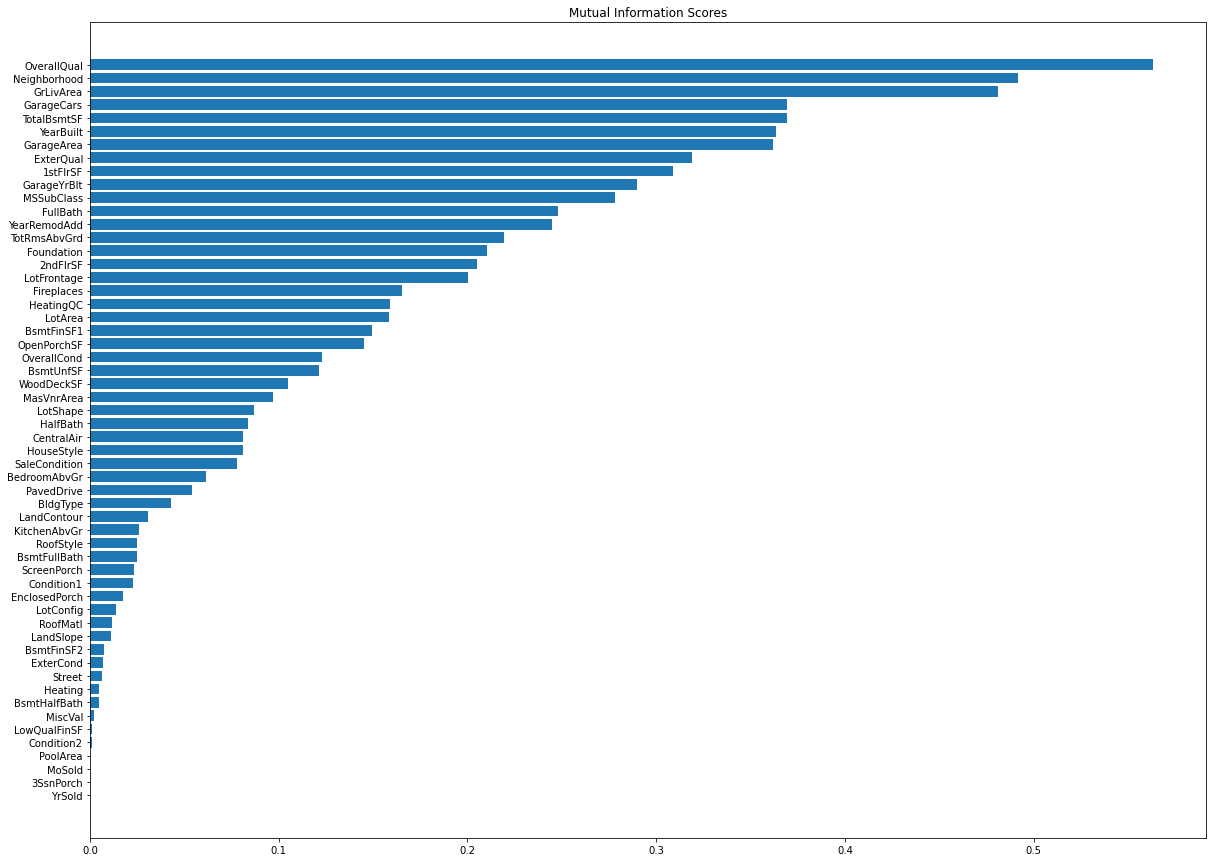

In [21]:
plt.figure(figsize=(20, 15))
plot_mi_scores(mi_score)

### Mathematical Transformation

In [22]:
# Lets create some features
X_1 = pd.DataFrame()  # dataframe to hold new features

X_1["LivLotRatio"] = X["GrLivArea"] / X["LotArea"]
X_1["Spaciousness"] = (X["1stFlrSF"]+X["2ndFlrSF"]) / X["TotRmsAbvGrd"]
X_1["TotalOutsideSF"] = X["WoodDeckSF"] + X["OpenPorchSF"] + X["EnclosedPorch"] + X["ScreenPorch"]

### From Encoded Categorical Variables

In [23]:
# Create some features from encoded categorical variables..
X_2 = pd.DataFrame()

X_2['Bldg'] = X['BldgType'] * X['GrLivArea']

### From GroupBy

In [24]:
X_3 = pd.DataFrame()
X_3["MedNhbdArea"] = X.groupby("Neighborhood")["GrLivArea"].transform("median")

In [25]:
X_FC = X.join([X_1, X_2, X_3])

### Performance Benchmark, before vs After Feature Creation

In [26]:
print("Base Score", r2_score(X,y))
print("After Feature Creation Score", r2_score(X_FC,y))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

Base Score 0.8698716185508133


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


After Feature Creation Score 0.8826553072871667


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## K-Means Clustering

In [27]:
from sklearn.cluster import KMeans

cluster_feature = ['GrLivArea',
                 'Neighborhood',
                 'GarageArea',
                 'GarageCars',
                 'ExterQual',
                 'LotArea']

X_Cluster = X[cluster_feature]
X_Cluster

,GrLivArea,Neighborhood,GarageArea,GarageCars,ExterQual,LotArea
Id,,,,,,
1,1710,0,548,2,0,8450
2,1262,1,460,2,1,9600
3,1786,0,608,2,0,11250
4,1717,2,642,3,1,9550
5,2198,3,836,3,0,14260
...,...,...,...,...,...,...
1456,1647,17,460,2,1,7917
1457,2073,6,500,2,1,13175
1458,2340,2,252,1,2,9042


In [28]:
X_Cluster = (X_Cluster - X_Cluster.mean()) / X_Cluster.std()
X_Cluster

,GrLivArea,Neighborhood,GarageArea,GarageCars,ExterQual,LotArea
Id,,,,,,
1,0.370207,-1.623576,0.350880,0.311618,-1.253645,-0.207071
2,-0.482347,-1.452278,-0.060710,0.311618,0.486204,-0.091855
3,0.514836,-1.623576,0.631510,0.311618,-1.253645,0.073455
4,0.383528,-1.280980,0.790533,1.649742,0.486204,-0.096864
5,1.298881,-1.109682,1.697903,1.649742,-1.253645,0.375020
...,...,...,...,...,...,...
1456,0.250316,1.288489,-0.060710,0.311618,0.486204,-0.260471
1457,1.061003,-0.595788,0.126376,0.311618,0.486204,0.266316
1458,1.569110,-1.280980,-1.033560,-1.026506,2.226053,-0.147760


In [29]:
kmeans = KMeans(n_clusters = 6, random_state = 0).fit(X_Cluster)
X_Cluster["Cluster"] = kmeans.labels_

In [30]:
X_Cluster

,GrLivArea,Neighborhood,GarageArea,GarageCars,ExterQual,LotArea,Cluster
Id,,,,,,,
1,0.370207,-1.623576,0.350880,0.311618,-1.253645,-0.207071,0
2,-0.482347,-1.452278,-0.060710,0.311618,0.486204,-0.091855,2
3,0.514836,-1.623576,0.631510,0.311618,-1.253645,0.073455,0
4,0.383528,-1.280980,0.790533,1.649742,0.486204,-0.096864,2
5,1.298881,-1.109682,1.697903,1.649742,-1.253645,0.375020,0
...,...,...,...,...,...,...,...
1456,0.250316,1.288489,-0.060710,0.311618,0.486204,-0.260471,4
1457,1.061003,-0.595788,0.126376,0.311618,0.486204,0.266316,2
1458,1.569110,-1.280980,-1.033560,-1.026506,2.226053,-0.147760,1


### Using Elbow Method for Checking number of Clusters

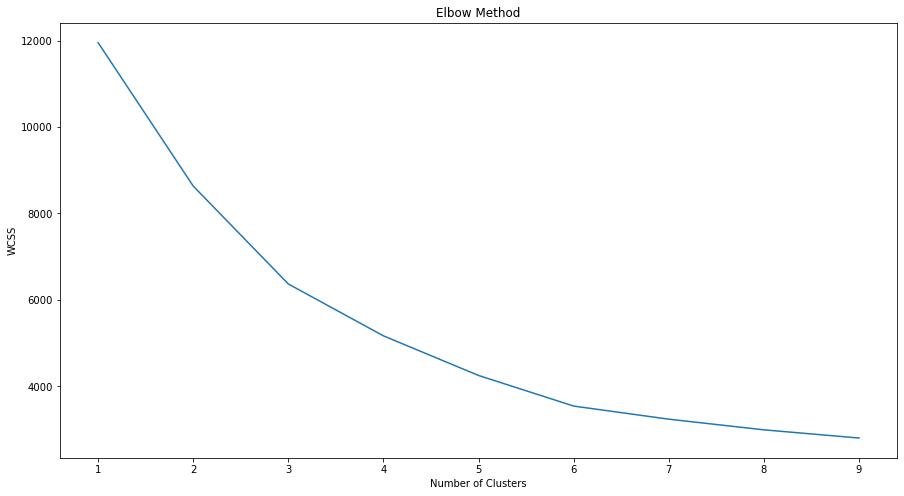

In [31]:
wcss = []
for i in range(1,10):
    kmeans= KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_Cluster)
    wcss.append(kmeans.inertia_)
    
plt.subplots(figsize=(15,8))
plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

As you can see, start from 6, the decrement starts to less significant. So, 6 is the best n of cluster.. No Need to revision...

In [32]:
X_Cluster2 = X.copy()
X_Cluster2['Cluster'] = X_Cluster['Cluster']
X_Cluster2

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,Cluster
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,0,0,0,0,0,0,0,...,61,0,0,0,0,0,2,2008,0,0
2,20,80.0,9600,0,0,0,1,0,1,1,...,0,0,0,0,0,0,5,2007,0,2
3,60,68.0,11250,0,1,0,0,0,0,0,...,42,0,0,0,0,0,9,2008,0,0
4,70,60.0,9550,0,1,0,2,0,2,0,...,35,272,0,0,0,0,2,2006,1,2
5,60,84.0,14260,0,1,0,1,0,3,0,...,84,0,0,0,0,0,12,2008,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,0,0,0,0,0,17,0,...,40,0,0,0,0,0,8,2007,0,4
1457,20,85.0,13175,0,0,0,0,0,6,0,...,0,0,0,0,0,0,2,2010,0,2
1458,70,66.0,9042,0,0,0,0,0,2,0,...,60,0,0,0,0,2500,5,2010,0,1


### Performance Benchmark, before vs After Clustering

In [33]:
print("Base Score", r2_score(X,y))
print("After Clustering Score", r2_score(X_Cluster2,y))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

Base Score 0.8698716185508133


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


After Clustering Score 0.8653596587050234


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Bit dissapointment... Clustering didn't give a good results...

## Principal Component Analysis

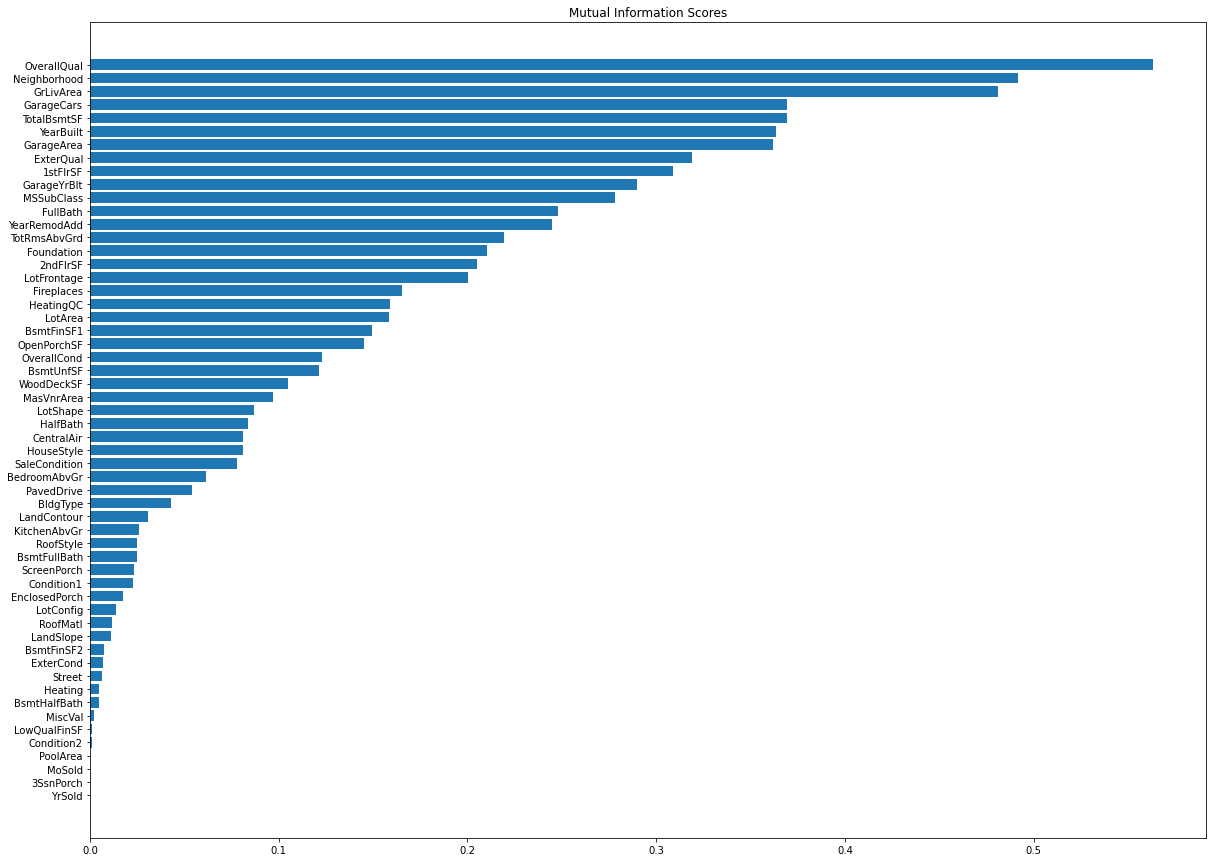

In [34]:
plt.figure(figsize=(20, 15))
plot_mi_scores(mi_score)

Pick top three features..

In [35]:
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition'],
      dtype='object')

In [36]:
features_PCA = ['OverallQual','Neighborhood','GrLivArea']

X_PCA = X[features_PCA]
X_PCA

,OverallQual,Neighborhood,GrLivArea
Id,,,
1,7,0,1710
2,6,1,1262
3,7,0,1786
4,7,2,1717
5,8,3,2198
...,...,...,...
1456,6,17,1647
1457,6,6,2073
1458,7,2,2340


In [37]:
# Scaling the values
X_PCA = (X_PCA-X_PCA.mean()) / X_PCA.std()
X_PCA

,OverallQual,Neighborhood,GrLivArea
Id,,,
1,0.651256,-1.623576,0.370207
2,-0.071812,-1.452278,-0.482347
3,0.651256,-1.623576,0.514836
4,0.651256,-1.280980,0.383528
5,1.374324,-1.109682,1.298881
...,...,...,...
1456,-0.071812,1.288489,0.250316
1457,-0.071812,-0.595788,1.061003
1458,0.651256,-1.280980,1.569110


In [38]:
from sklearn.decomposition import PCA

#Create Principal Components
pca = PCA()
X_pca = pca.fit_transform(X_PCA)

#Convert to DF
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca

,PC1,PC2,PC3
0,1.062948,-1.436987,-0.048931
1,-0.060624,-1.523982,-0.143975
2,1.161676,-1.404645,0.051690
3,0.996861,-1.101410,-0.072805
4,2.088122,-0.667773,0.032788
...,...,...,...
1455,-0.161934,1.300643,0.100619
1456,0.804951,-0.347358,0.846903
1457,1.806166,-0.836286,0.752022
1458,-1.179560,-0.001938,-0.038629


In [39]:
# Get Loadings
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X_PCA.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3
OverallQual,0.697045,0.086636,-0.711775
Neighborhood,-0.219443,0.970818,-0.096736
GrLivArea,0.682623,0.223623,0.695715


Dari hasil PCA ini, maka diputuskan untuk membuat fitur baru, yaitu
- OverallQual + GrLivArea (karena korelasinya sama-sama tinggi)
- Neighborhood + GrLivArea (alasan yang sama)
- GrLivArea / OverallQual (karena berbanding terbalik)

In [40]:
X_PCA = X.copy()
X_PCA["QualArea"] = X_PCA["GrLivArea"] + X_PCA["OverallQual"]
X_PCA["NeighArea"] = X_PCA["Neighborhood"] + X_PCA["GrLivArea"]
X_PCA["AreaQualratio"] = X_PCA["GrLivArea"] / X_PCA["OverallQual"]

In [41]:
X_PCA

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,QualArea,NeighArea,AreaQualratio
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,0,0,0,0,0,0,0,...,0,0,0,0,2,2008,0,1717,1710,244.285714
2,20,80.0,9600,0,0,0,1,0,1,1,...,0,0,0,0,5,2007,0,1268,1263,210.333333
3,60,68.0,11250,0,1,0,0,0,0,0,...,0,0,0,0,9,2008,0,1793,1786,255.142857
4,70,60.0,9550,0,1,0,2,0,2,0,...,0,0,0,0,2,2006,1,1724,1719,245.285714
5,60,84.0,14260,0,1,0,1,0,3,0,...,0,0,0,0,12,2008,0,2206,2201,274.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,0,0,0,0,0,17,0,...,0,0,0,0,8,2007,0,1653,1664,274.500000
1457,20,85.0,13175,0,0,0,0,0,6,0,...,0,0,0,0,2,2010,0,2079,2079,345.500000
1458,70,66.0,9042,0,0,0,0,0,2,0,...,0,0,0,2500,5,2010,0,2347,2342,334.285714


### Performance Benchmark, before vs After PCA

In [42]:
print("Base Score", r2_score(X,y))
print("After PCAg Score", r2_score(X_PCA,y))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

Base Score 0.8698716185508133


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


After PCAg Score 0.87222910443113


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## Join All Dataset (Mutual Information, Feature Creation, Cluster, and PCA)

In [43]:
# From Mutual Information
Final_X = X_MI

# From Feature Creation
Final_X = Final_X.join([X_1, X_2, X_3])

# From Clustering, we do not include, because didn't get good results
# Final_X['Cluster'] = X_Cluster['Cluster']

# From PCA
Final_X['QualArea'] = X_PCA["QualArea"]
Final_X['NeighArea'] = X_PCA["NeighArea"]
Final_X['AreaQualratio'] = X_PCA["AreaQualratio"]

Final_X

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,MiscVal,SaleCondition,LivLotRatio,Spaciousness,TotalOutsideSF,Bldg,MedNhbdArea,QualArea,NeighArea,AreaQualratio
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,0,0,0,0,0,0,0,...,0,0,0.202367,213.750000,61,0,1500.0,1717,1710,244.285714
2,20,80.0,9600,0,0,0,1,0,1,1,...,0,0,0.131458,210.333333,298,0,1437.0,1268,1263,210.333333
3,60,68.0,11250,0,1,0,0,0,0,0,...,0,0,0.158756,297.666667,42,0,1500.0,1793,1786,255.142857
4,70,60.0,9550,0,1,0,2,0,2,0,...,0,1,0.179791,245.285714,307,0,1717.0,1724,1719,245.285714
5,60,84.0,14260,0,1,0,1,0,3,0,...,0,0,0.154137,244.222222,276,0,2418.0,2206,2201,274.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,0,0,0,0,0,17,0,...,0,0,0.208033,235.285714,40,0,1593.0,1653,1664,274.500000
1457,20,85.0,13175,0,0,0,0,0,6,0,...,0,0,0.157343,296.142857,349,0,1664.0,2079,2079,345.500000
1458,70,66.0,9042,0,0,0,0,0,2,0,...,2500,0,0.258792,260.000000,60,0,1717.0,2347,2342,334.285714


### Performance Benchmark, before vs After Feature Engineering

In [44]:
print("Base Score", r2_score(X,y))
print("After PCAg Score", r2_score(Final_X,y))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

Base Score 0.8698716185508133


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


After PCAg Score 0.8845228556682228


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## Optimization (Using Optuna)

In [45]:
import optuna

def objective(trial):
    xgb_params = dict(
        max_depth=trial.suggest_int("max_depth", 2, 40),
        learning_rate=trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
        n_estimators=trial.suggest_int("n_estimators", 1000, 8000),
        min_child_weight=trial.suggest_int("min_child_weight", 1, 40),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.2, 1.0),
        subsample=trial.suggest_float("subsample", 0.2, 1.0),
        reg_alpha=trial.suggest_float("reg_alpha", 1e-4, 1e2, log=True),
        reg_lambda=trial.suggest_float("reg_lambda", 1e-4, 1e2, log=True),
    )
    xgb = XGBRegressor(**xgb_params)
    return r2_score(Final_X, y, xgb)

study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials=20)
xgb_params = study.best_params

ModuleNotFoundError: No module named 'optuna'

In [ ]:
print("Best Parameters: ", xgb_params)

In [ ]:
xgb = XGBRegressor(**xgb_params)

In [ ]:
xgb.fit(Final_X, y)

## Final Performance Benchmark, before vs After Feature Engineering + Optimization

In [ ]:
print("Base Score", r2_score(X,y))

In [ ]:
print("After Feature Engineering + Optimization: ", r2_score(Final_X,y, model=xgb))